In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def make_affine(theta, s, t):
    return np.concatenate((np.append(s[0] * np.array([math.cos(theta), -math.sin(theta)]), 0),
                           np.append(s[1] * np.array([math.sin(theta), math.cos(theta)]), 0),
                           np.array([t[0], t[1], 1]))).reshape(3, 3).T

In [3]:
t1 = make_affine(math.pi/6, [2, 3], [1, 0])
t2 = make_affine(math.pi/3, [4, 1], [0, 5])
t3 = make_affine(-math.pi/7, [0.3, 2], [10, -2])

print(t1)
print(t2)
print(t3)

[[ 1.73205081  1.5         1.        ]
 [-1.          2.59807621  0.        ]
 [ 0.          0.          1.        ]]
[[ 2.          0.8660254   0.        ]
 [-3.46410162  0.5         5.        ]
 [ 0.          0.          1.        ]]
[[ 0.27029066 -0.86776748 10.        ]
 [ 0.13016512  1.80193774 -2.        ]
 [ 0.          0.          1.        ]]


In [4]:
t_compose = np.linalg.inv(t1) @ t3 @ t2 @ t1

In [5]:
t_compose

array([[ 5.5900843 ,  3.6635615 ,  3.29709154],
       [-2.22639045, -1.02977309,  1.66469906],
       [ 0.        ,  0.        ,  1.        ]])

In [6]:
coords = np.array([[0, 0, 1], [0, 1, 1], [2, 1, 1], [2, 0, 1], [0, 0, 1]])

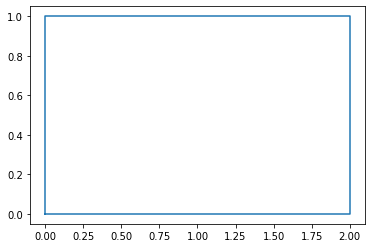

In [7]:
plt.plot(coords[:, 0], coords[:, 1])

In [8]:
coords_compose = (t_compose @ coords.T).T

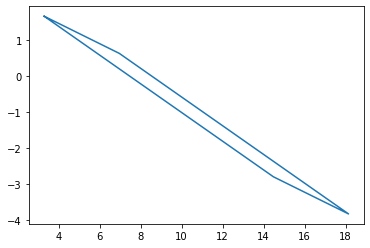

In [9]:
plt.plot(coords_compose[:, 0], coords_compose[:, 1])

In [10]:
def affine_decompose_trs(affine):
    s0 = math.sqrt(affine[0, 0] ** 2 + affine[1, 0] ** 2)
    s1 = math.sqrt(affine[0, 1] ** 2 + affine[1, 1] ** 2)
    
    t = np.eye(3)
    t[:2, 2] = affine[:2, 2]
    
    r = affine
    r[:2, 2] = 0
    r[0, 0] /= s0
    r[1, 0] /= s0
    r[0, 1] /= s1
    r[1, 1] /= s1
    
    s = np.eye(3)
    s[0, 0] = s0
    s[1, 1] = s1
    
    return t, r, s

In [11]:
t, r, s = affine_decompose_trs(np.copy(t_compose))

print(t)
print(r)
print(s)

[[1.         0.         3.29709154]
 [0.         1.         1.66469906]
 [0.         0.         1.        ]]
[[ 0.9290283   0.96269227  0.        ]
 [-0.37000868 -0.27059859  0.        ]
 [ 0.          0.          1.        ]]
[[6.01713029 0.         0.        ]
 [0.         3.80553748 0.        ]
 [0.         0.         1.        ]]


In [12]:
coords_trs = (t @ r @ s @ coords.T).T

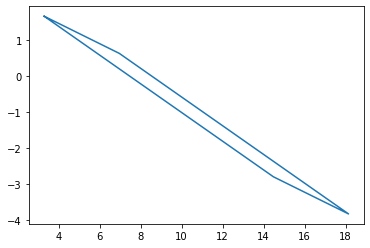

In [13]:
plt.plot(coords_trs[:, 0], coords_trs[:, 1])

In [14]:
from scipy.spatial.transform import Rotation as R

In [15]:
r_new = R.from_matrix(r)

In [16]:
r_new.as_matrix()

array([[ 0.59832105,  0.80125646,  0.        ],
       [-0.80125646,  0.59832105, -0.        ],
       [-0.        ,  0.        ,  1.        ]])

In [17]:
coords_trs_new = (t @ r_new.as_matrix() @ s @ coords.T).T

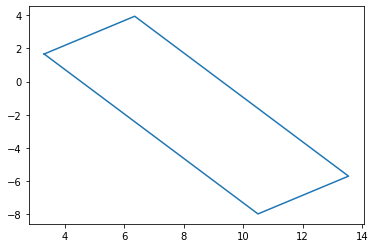

In [18]:
plt.plot(coords_trs_new[:, 0], coords_trs_new[:, 1])